## Data from KGB-evolution

In [1]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()



# Gauge transformation study

## CLASS k-essence Newtonian vs Synchronous

In [12]:
redshifts=[1000, 500,100,50,10,3,1,0];
pk_new=[];
pk_sync=[];
tk_new=[];
tk_sync=[];
# address_ref='/Users/farbod/Packages/class_public-2.7.1//output/'
address_ref='./../../EQ_hi_class/output/'

for i in range(np.shape(redshifts)[0]):
#     pk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_pk.dat"));
#     pk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_pk.dat"))

    tk_new.append(np.loadtxt(address_ref+"class_new_z"+str(i+1)+"_tk.dat"));
    tk_sync.append(np.loadtxt(address_ref+"class_sync_z"+str(i+1)+"_tk.dat"));

bg= np.loadtxt(address_ref+"class_new_background.dat")
Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])
#     newt_tk = 

## Power spectrum

In [6]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,6):
    
#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;

#     z= redshifts[i];
#     plt.plot(pk_new[i][:,0], pk_new[i][:,1],"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(pk_sync[i][:,0], pk_sync[i][:,1],"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e0)
# # plt.ylim(1.e-14,1.e-8)

## Transfer functions

### d_cdm

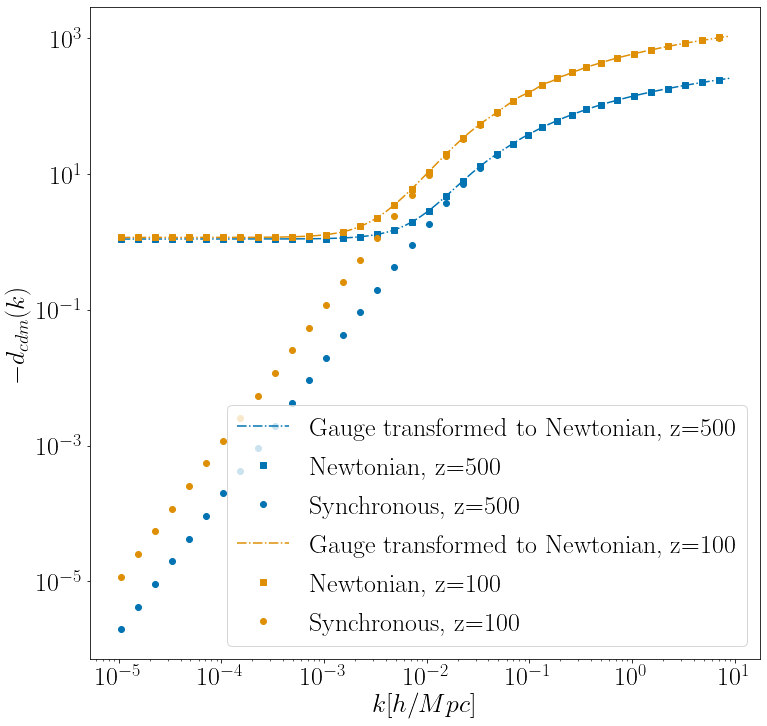

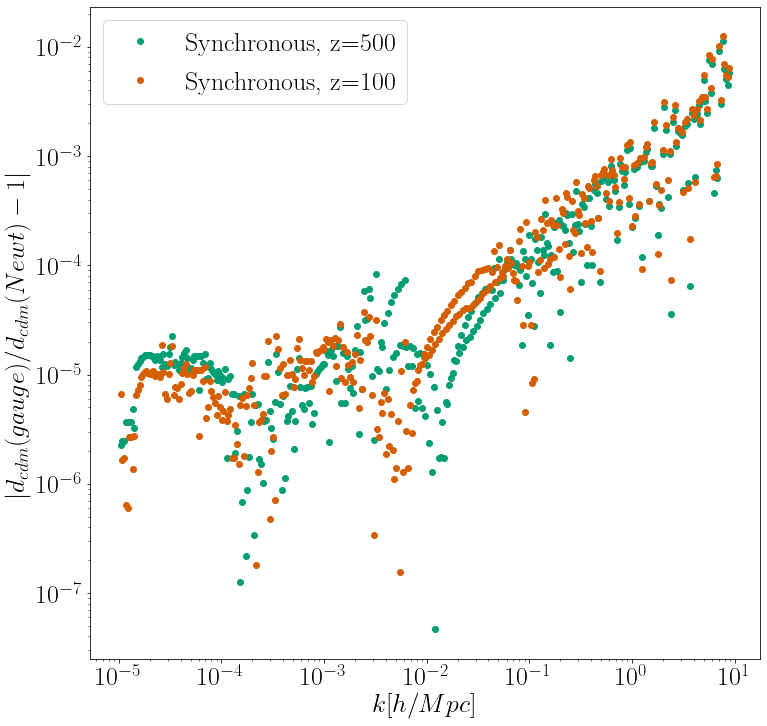

In [46]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373

plt.figure(figsize=(12,12))

l=0
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
rho_cdm_prime = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )

for i in range(1,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
    plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::everynum,0], -(tk_sync[i][::everynum,3]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$-d_{cdm}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')


#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(1,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton = tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)
    Newto_transfer = tk_new[i][:,3]
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|d_{cdm}(gauge)/d_{cdm}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')


# plt.xlim(1.e-5,1.e-2)
# plt.ylim(-5,4.0)

### d_b

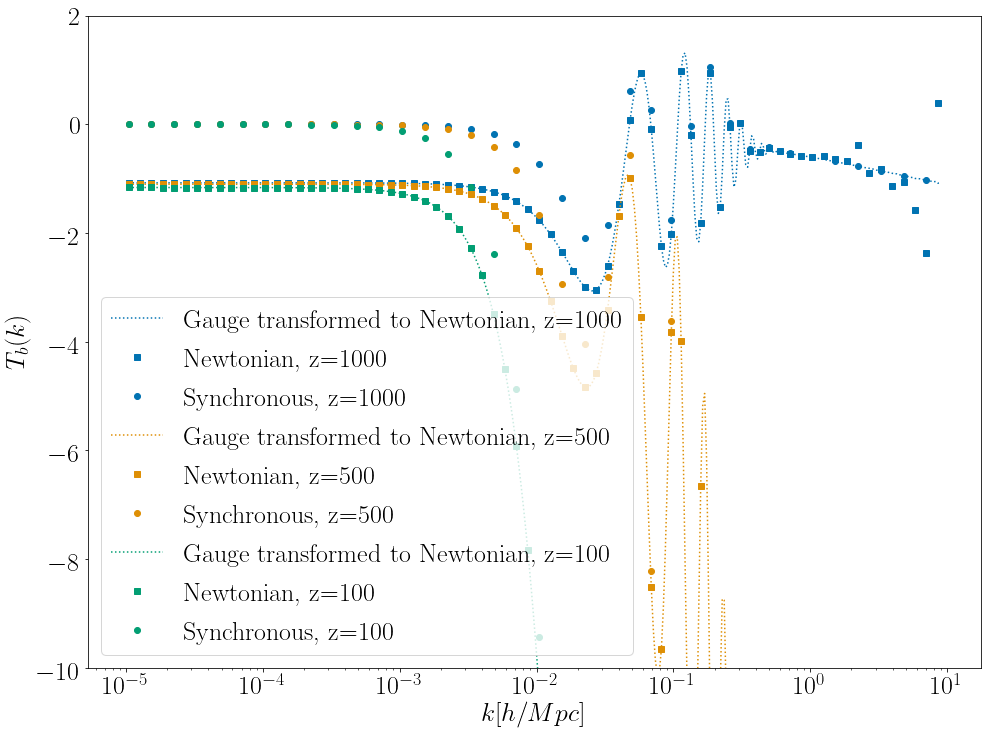

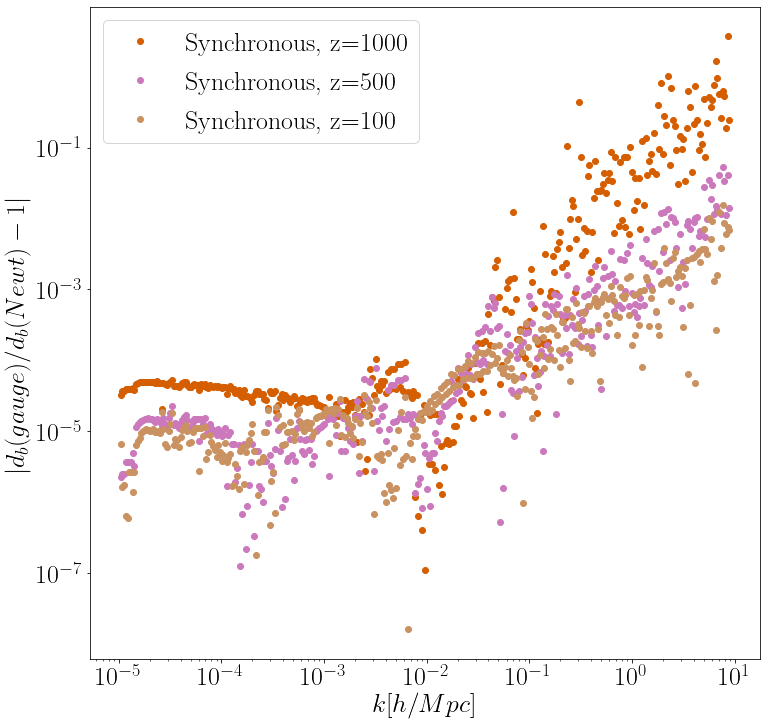

In [82]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(16,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2]-alpha/h/h * 3. * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,2]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::10,0], (tk_sync[i][::10,2]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{b}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-2)
plt.ylim(-10,2.0)


#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(0,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton = (tk_sync[i][:,2]-alpha/h/h * 3. * Hconf_hiclass(z))
    Newto_transfer = tk_new[i][:,2]
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|d_{b}(gauge)/d_{b}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')



### d_g

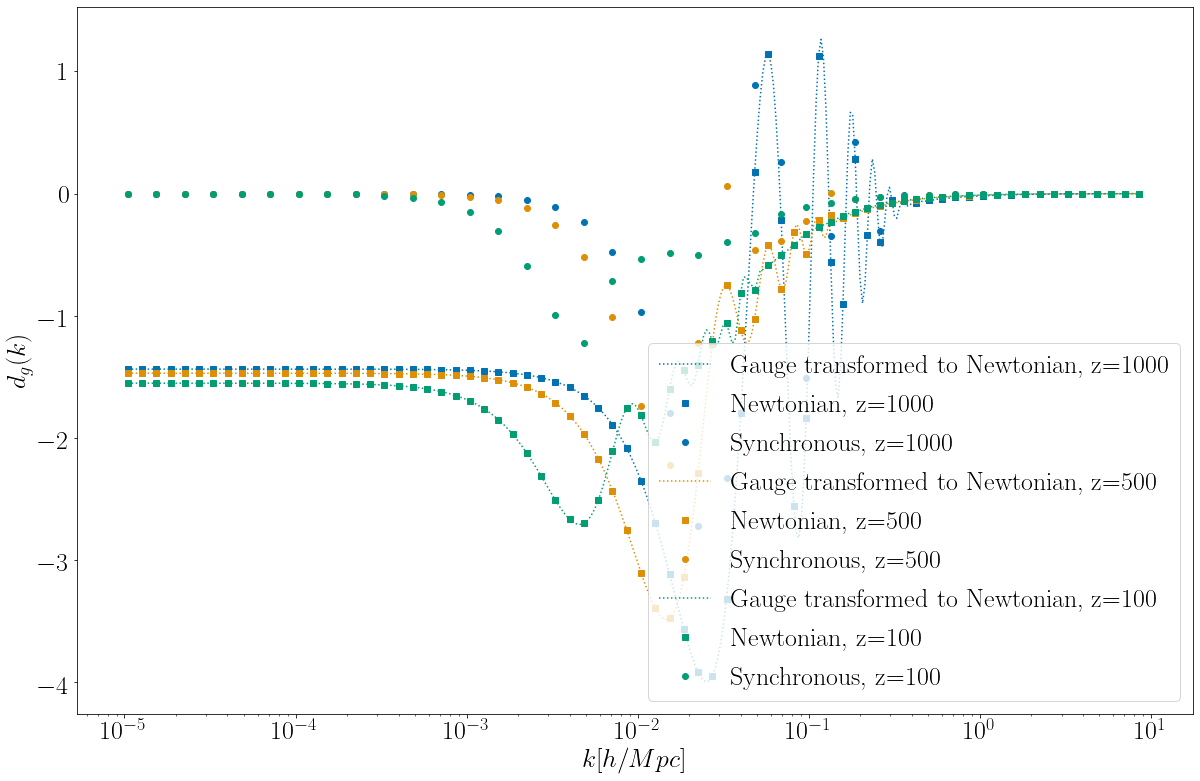

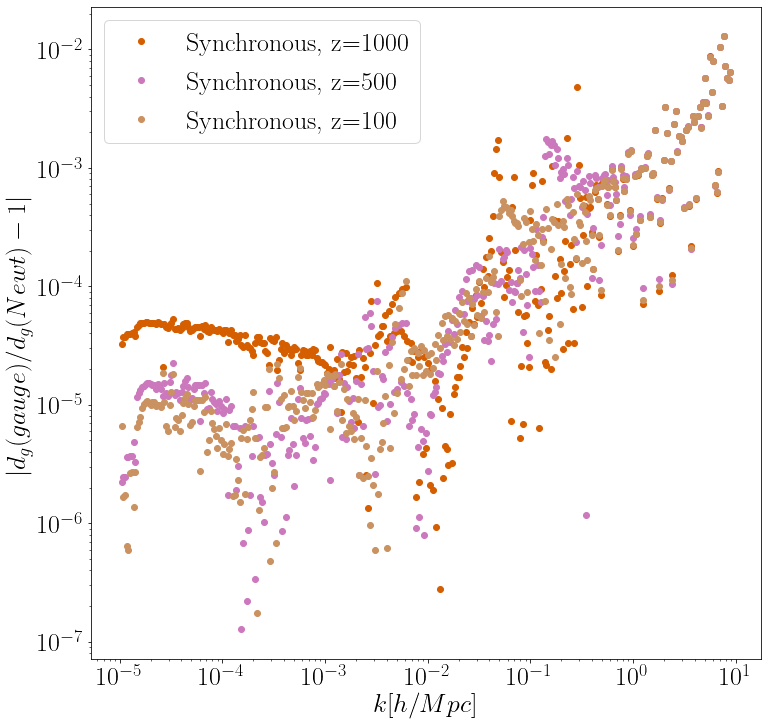

In [75]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(20,13))

l=0
for i in range(0,3):
    z= redshifts[i];
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1]-alpha/h/h * 4. * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,1]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::10,0], (tk_sync[i][::10,1]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$d_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-2)
# plt.ylim(1.,10.0)


#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(0,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton =(tk_sync[i][:,1]-alpha/h/h * 4. * Hconf_hiclass(z))
    Newto_transfer =(tk_new[i][::1,1])
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|d_{g}(gauge)/d_{g}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')



### d_fld

(-3, 0.5)

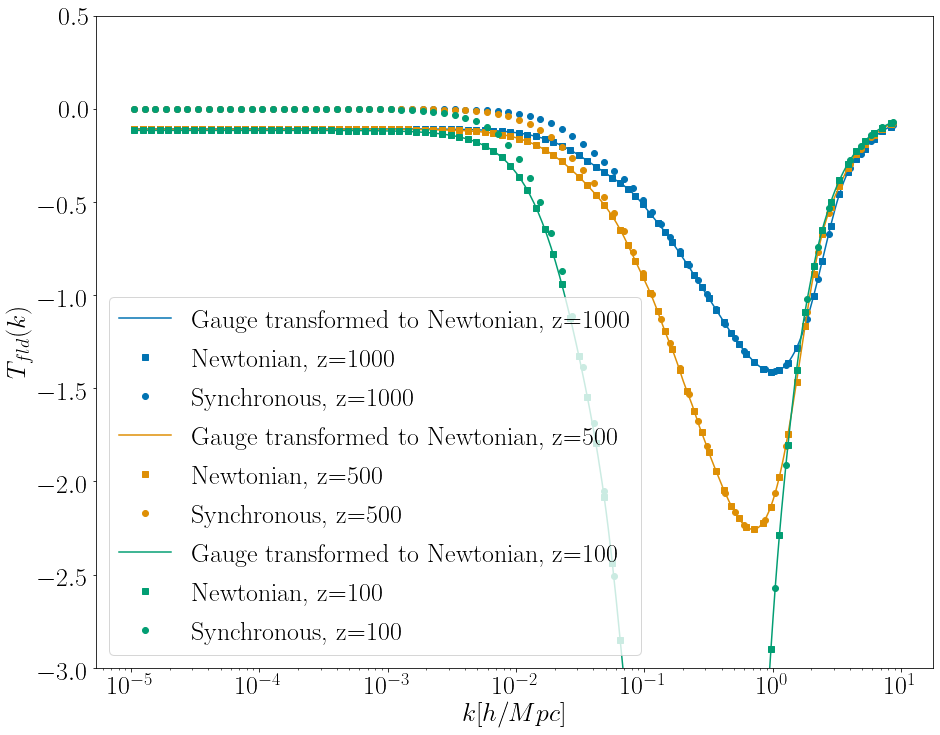

In [146]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    w=-0.9
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4]-alpha/h/h * 3. * (1+w) * Hconf_hiclass(z)),"-",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::4,0], (tk_new[i][::4,4]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,4]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{fld}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-3,0.5)

### d_ur

(-3, 1)

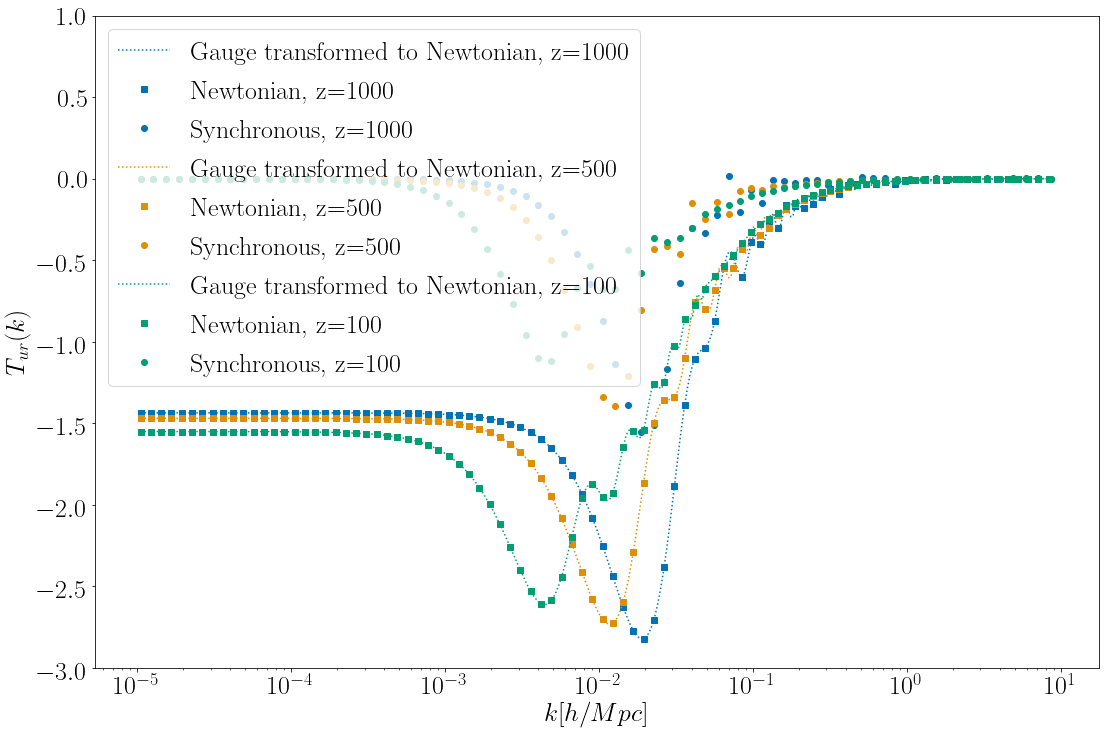

In [151]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(18,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    w=1/3
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,5]-alpha/h/h * 3. * (1+w) * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::4,0], (tk_new[i][::4,5]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,5]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{ur}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-3,1)

### d_tot

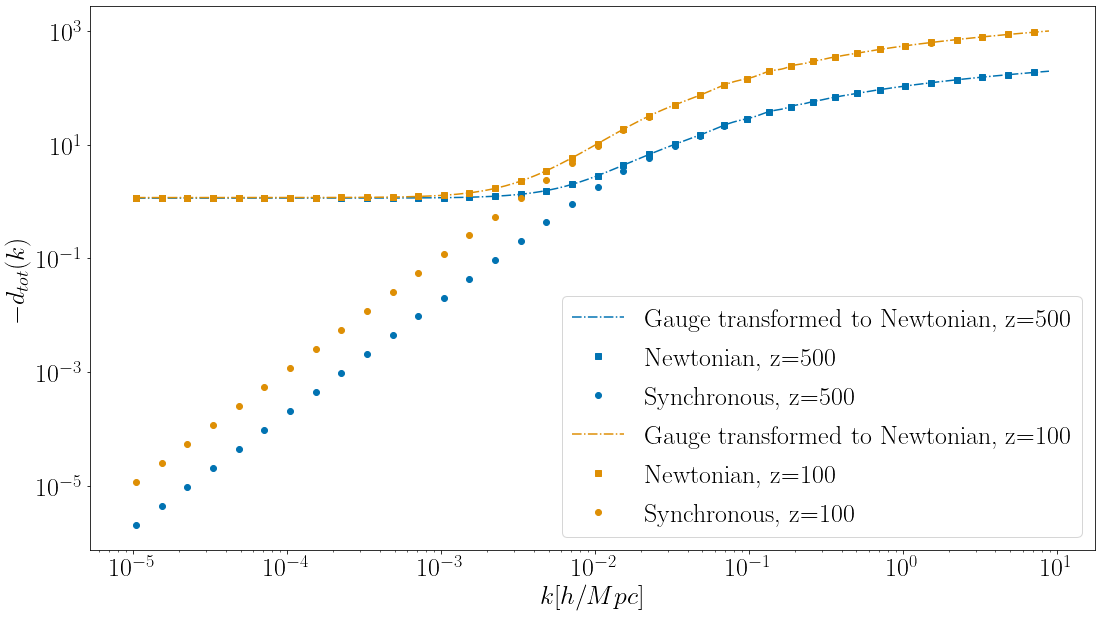

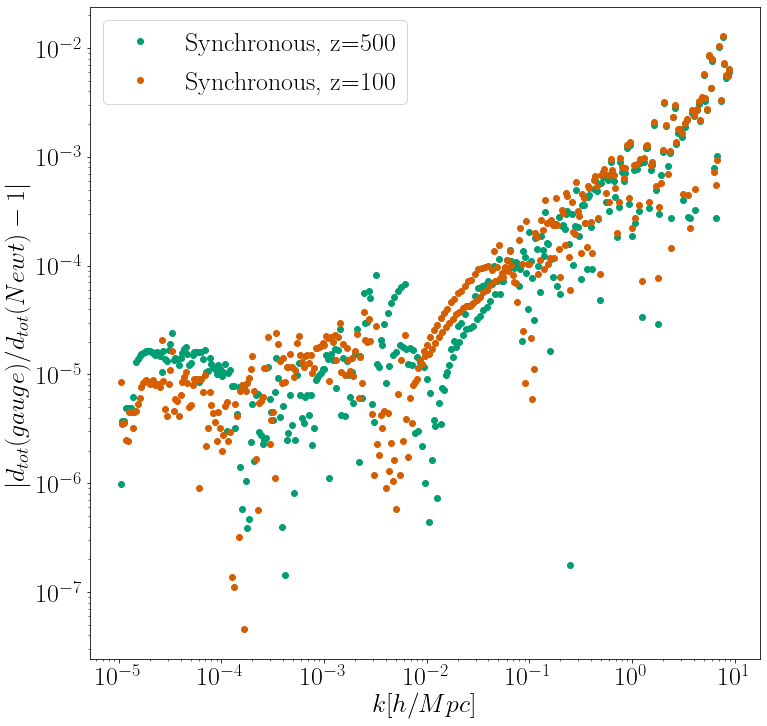

In [49]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(18,10))
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
# rho_fld = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_rad = interpolate.interp1d(bg[:,0] ,bg[:,13])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,15])
# w_fld = interpolate.interp1d(bg[:,0] ,bg[:,13])
fld = 0
w_fld=0
l=0
for i in range(1,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    
    matter = ((rho_b(z)+rho_cdm(z))*(1+w_fld *0.0))/rho_tot(z)
    rad = ((rho_rad(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
#     fld = (rho_fld(z)*(1+w_fld(z)))/rho_tot(z)

#     w=1/3
    everynum = 10
    plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,5]-alpha/h/h * 3. * (matter + rad +fld ) * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,5]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::everynum,0], -(tk_sync[i][::everynum,5]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$-d_{tot}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(-15,0.5)




#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(1,3):
    
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    
    matter = ((rho_b(z)+rho_cdm(z))*(1+w_fld *0.0))/rho_tot(z)
    rad = ((rho_rad(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
    
    
    GT_newton = (tk_sync[i][:,5]-alpha/h/h * 3. * (matter + rad +fld ) * Hconf_hiclass(z))
    Newto_transfer = tk_new[i][:,5]
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|d_{tot}(gauge)/d_{tot}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')





### t_cdm

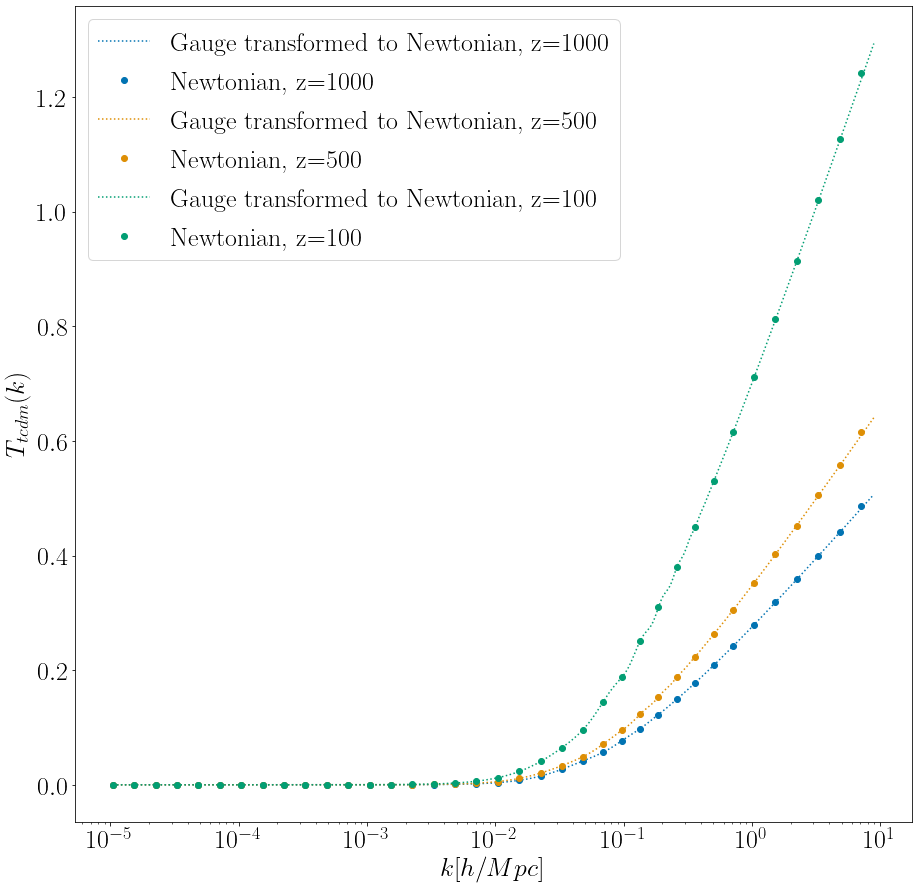

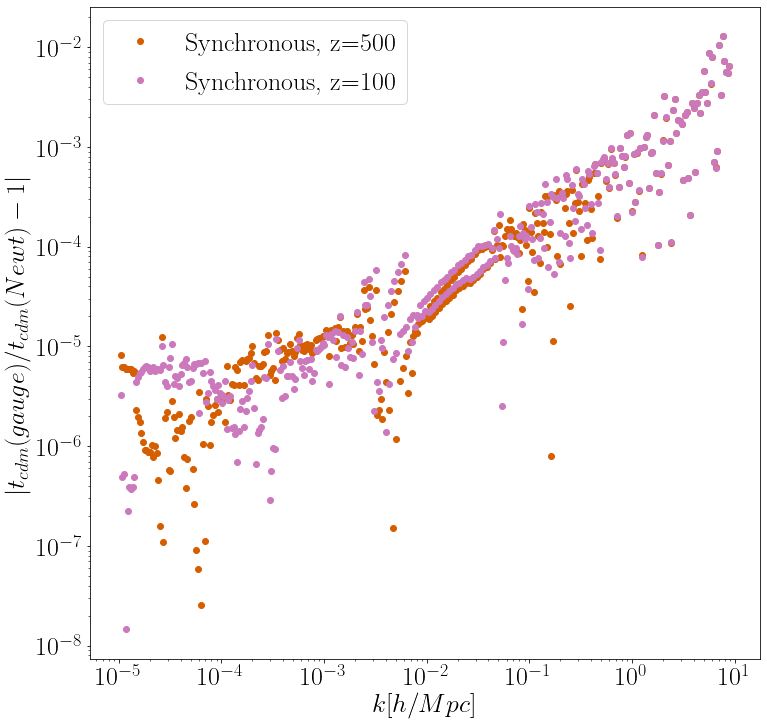

In [52]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    everynum = 10
    
    plt.plot(tk_sync[i][:,0], +alpha*k*k,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::everynum,0], tk_new[i][::everynum,13],"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (0)**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tcdm}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)


#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(1,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton = +alpha*k*k
    Newto_transfer =tk_new[i][:,13]
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|t_{cdm}(gauge)/t_{cdm}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')

### t_b

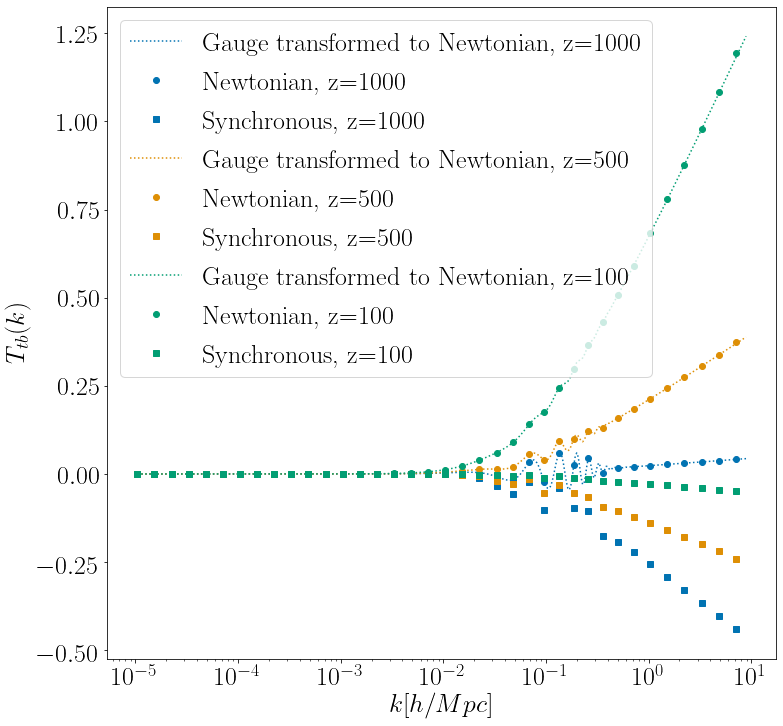

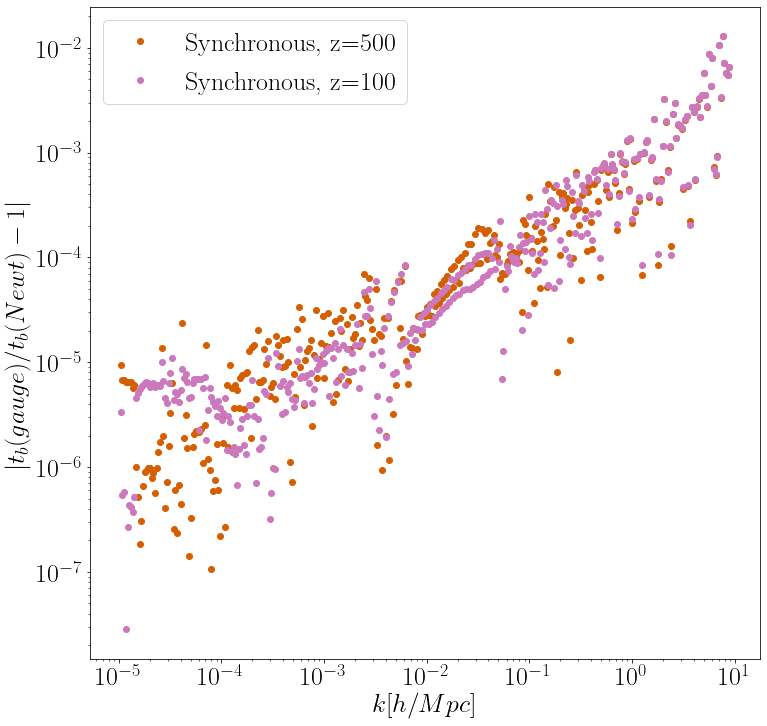

In [60]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    # Note that alpha is in 1/Mpc and also t_k in class is in 1/Mpc without h.
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,15]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::10,0], (tk_new[i][::10,12]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::10,0], (tk_sync[i][::10,15]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tb}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)


#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(1,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton =(tk_sync[i][:,15]+alpha*k*k)
    Newto_transfer =(tk_new[i][:,12])
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|t_{b}(gauge)/t_{b}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')

### t_g

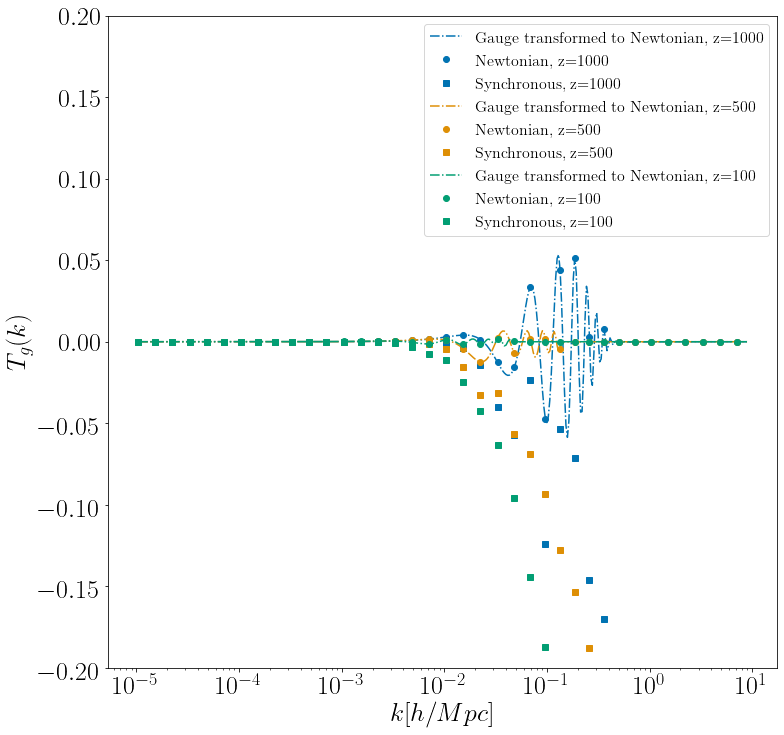

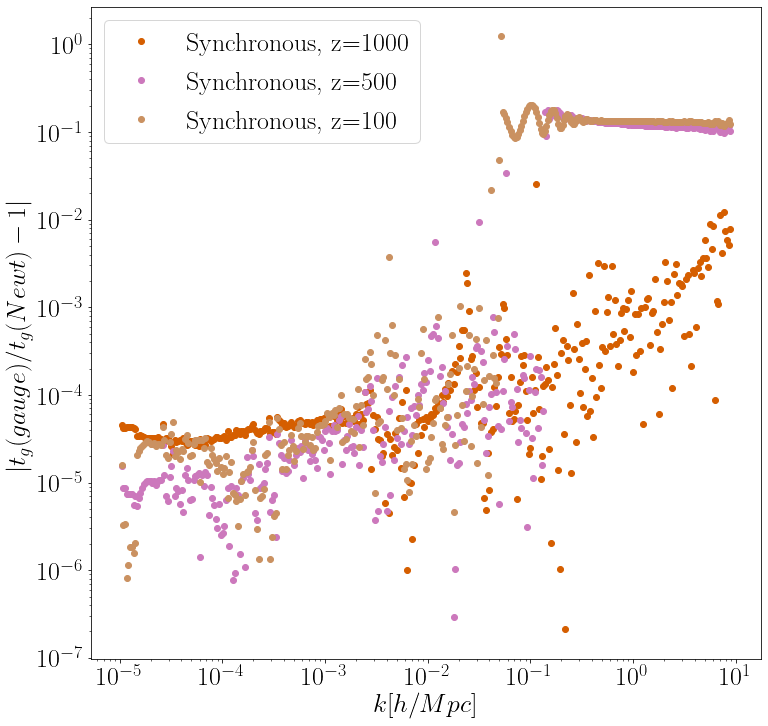

In [74]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    everynum = 10
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,14]+alpha*k*k),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::10,0], (tk_new[i][::10,11]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::10,0], (tk_sync[i][::10,14]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend(fontsize=16)
plt.ylabel(r"$T_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(0,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton =(tk_sync[i][:,14]+alpha*k*k)
    Newto_transfer =(tk_new[i][:,11])
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|t_{g}(gauge)/t_{g}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')



### t_fld

(-0.2, 0.2)

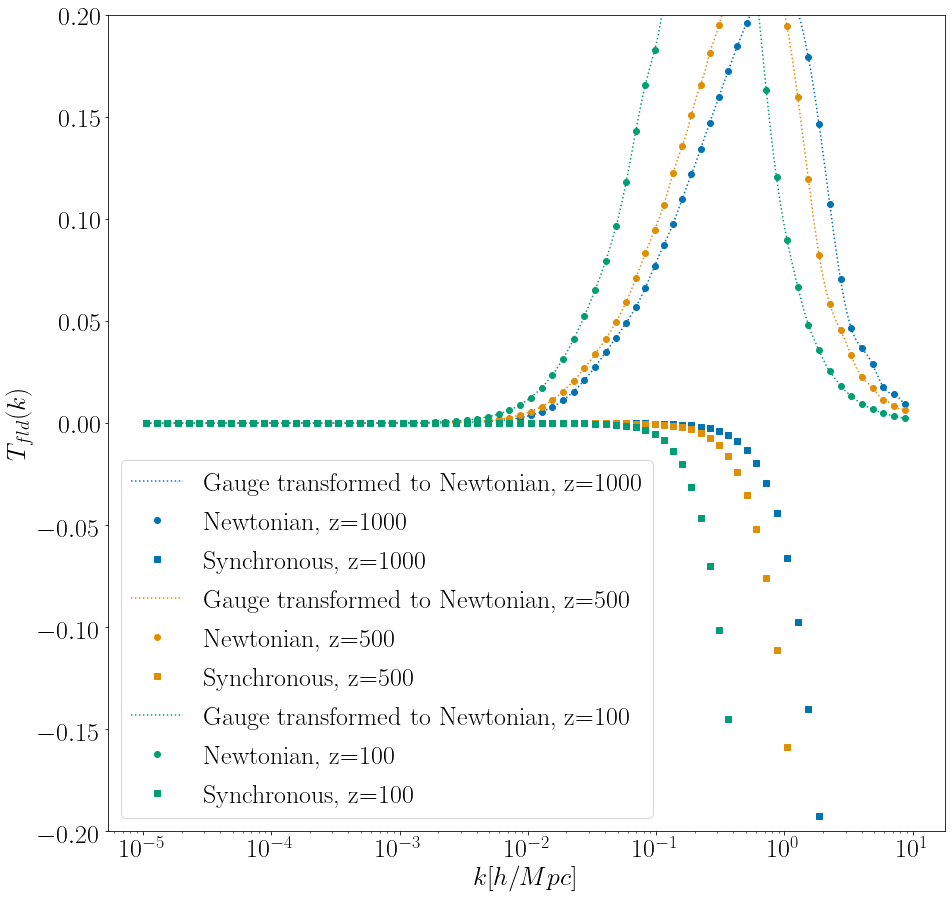

In [174]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,17]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,15]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,17]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{fld}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



### t_ur

(-0.2, 0.2)

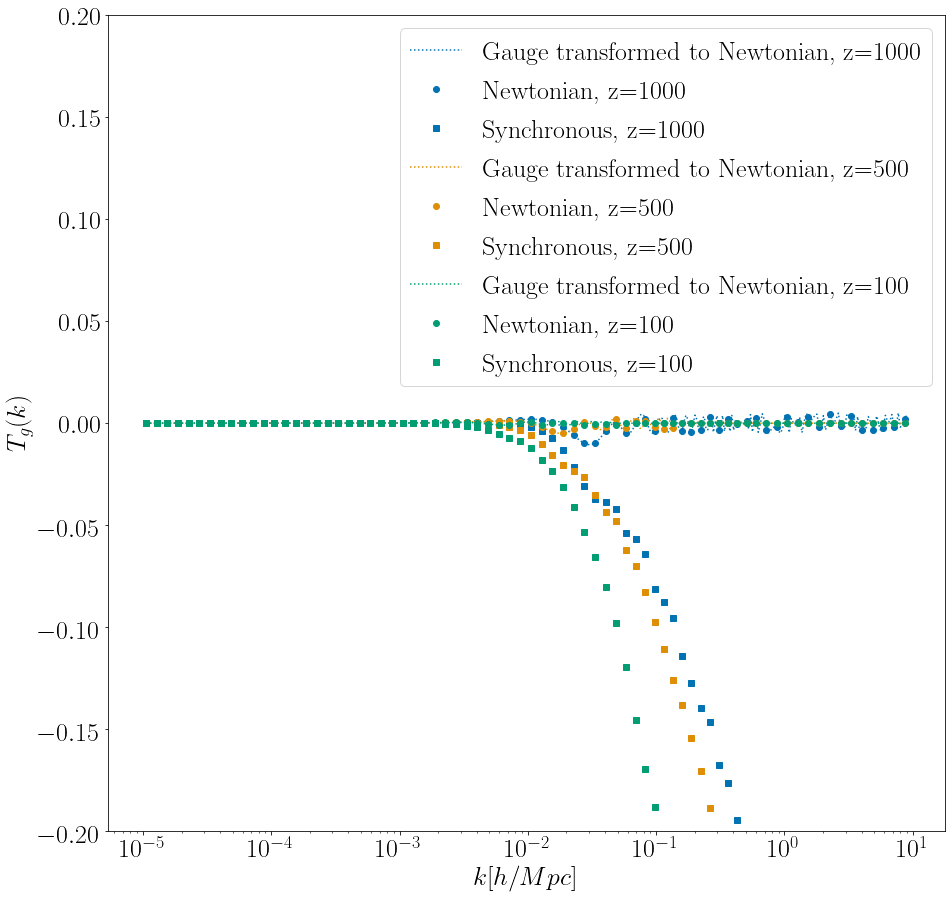

In [175]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,18]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,16]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,18]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



### t_tot

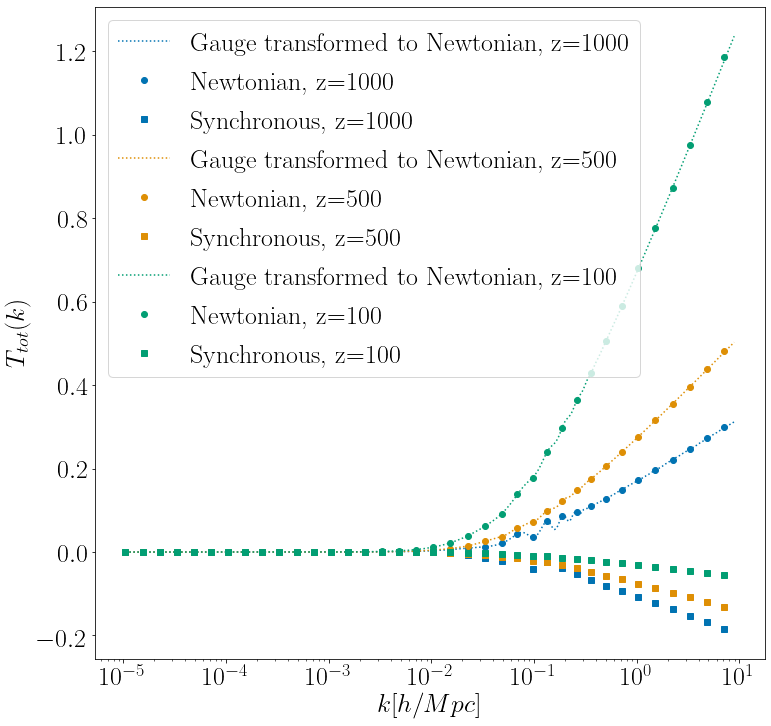

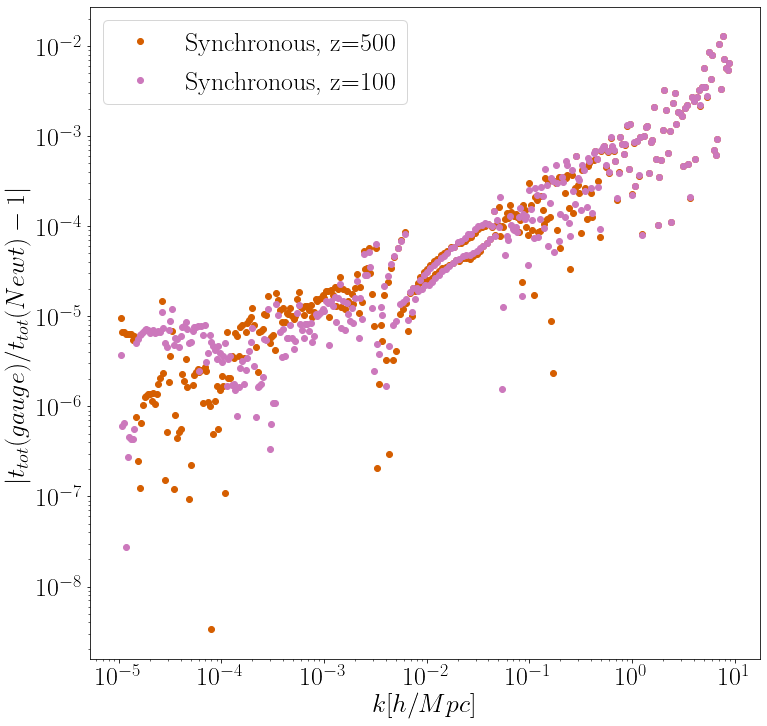

In [50]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    everynum = 10
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,17]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::everynum,0], (tk_new[i][::everynum,15]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::everynum,0], (tk_sync[i][::everynum,17]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tot}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)



#### Rel diff:

plt.figure(figsize=(12,12))
for i in range(1,3):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,9]
    eta_prime = tk_sync[i][:,11]
    psi = tk_sync[i][:,7]
    phi = tk_sync[i][:,6]
    eta = tk_sync[i][:,10]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];
    everynum = 10
    GT_newton = tk_sync[i][:,17]+alpha*k*k
    Newto_transfer = tk_new[i][:,15]
#     plt.plot(tk_sync[i][:,0], -(tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][::everynum,0], -(tk_new[i][::everynum,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][:,0], np.abs(GT_newton/Newto_transfer -1.),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$|t_{tot}(gauge)/t_{tot}(Newt) - 1|$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')


